In [39]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [50]:
dfn = 139 - 1
dfd = 1000 - 1
alpha = 0.05

# 0.975 квантиль для Фишера
u975 = sp.stats.f.ppf(0.975, dfn, dfd)
print(f"Квантиль 0.975 - {u975:.3f}")

u025 = sp.stats.f.ppf(0.025, dfn, dfd)
print(f"Квантиль 0.025 - {u025:.3f}")

q1 = sp.integrate.quad(sp.stats.f.pdf, 1.272, np.inf, args=(dfn, dfd))[0]
q2 = sp.integrate.quad(sp.stats.f.pdf, -np.inf, 0.767, args=(dfn, dfd))[0]
print(f"Мощность критерия {(q1 + q2):.3f}")

Квантиль 0.975 - 1.272
Квантиль 0.025 - 0.767
Мощность критерия 0.050


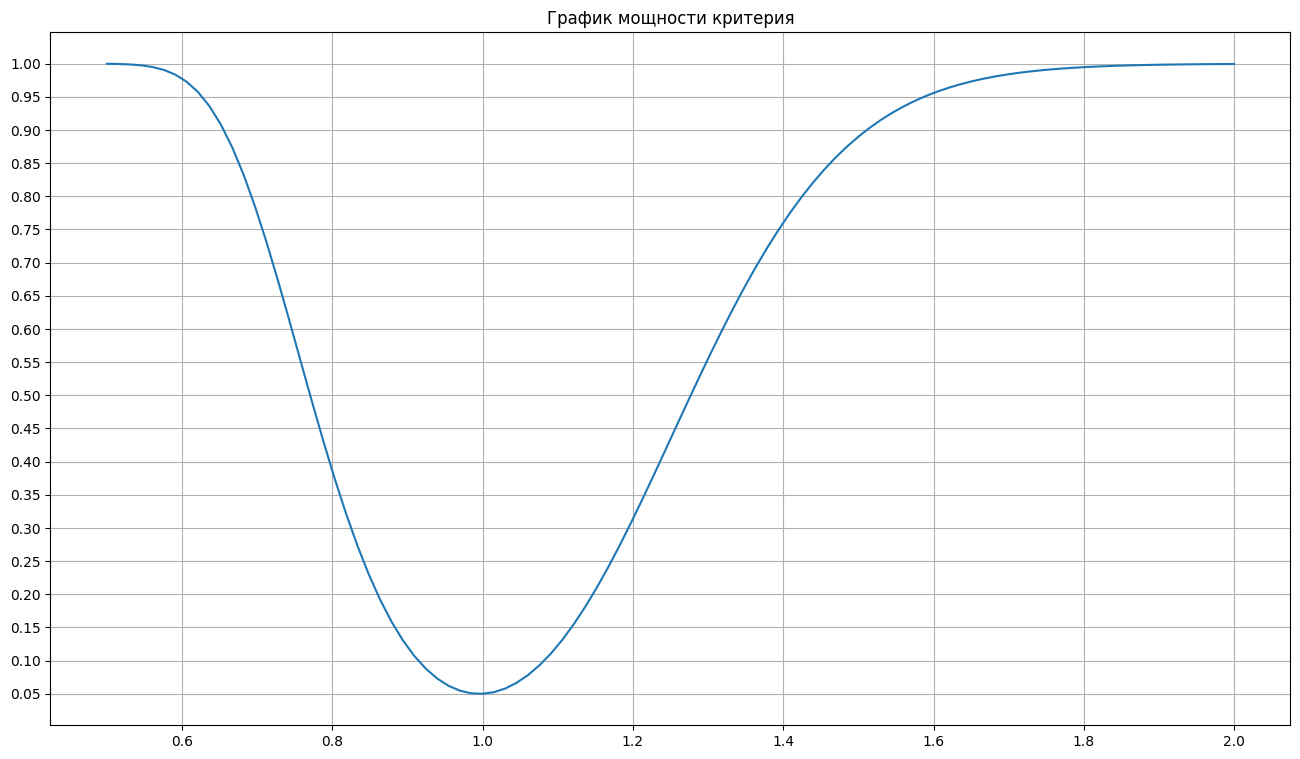

In [51]:
H1 = np.linspace(0.5, 2, 100)
power = []

for elem in H1:
    y = sp.stats.f.cdf(u025, dfn, dfd, scale=elem) + (1 - sp.stats.f.cdf(u975, dfn, dfd, scale=elem))
    power.append(y)

plt.figure(figsize=(16, 9))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.title("График мощности критерия")
plt.plot(H1, power)
plt.grid(True)